# Customer Data Aanlysis

### -- Analysis and Modeling on a credit card customer dataset for business insights.

## Table of Content.

- Notebook I: Data Cleaning and first stage EDA.


- Notebook II: Churn Prediction.
         
         
- Notebook III: Customer Segementation.


- Notebook IV: Custermer Lifetime Value Analysis.

         
## This is Notebook I : Data Cleaning and EDA.

0. Data Loading.


1. Data Cleaning.

        1.1 number of features, overview of feature names.
     
        1.2 missing data.
     
        1.3 duplication.
     
        1.4 Categorical Features and Encoding.
     
        1.5 Outliers.
    
     
2. EDA.

        2.1 Pairplots
    
        2.2 Correlation heat map.
    
        2.3 Actions

    
3. Data Saving.

In [2]:
# This is Python 3 environment, with Anaconda distribution of several helpful standard libraries.
# Additional modules/packages may needed: xgboost, pickle.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle



## 0. Data Loading.

In [3]:
filename = '0_BankChurners.csv'

data = pd.read_csv(filename)

In [4]:
df = data.copy()

## 1. Data Cleaning.

Overall Summary:

1. df.shape = (10127, 23)
2. There is no obvious missing data. But there are 'Unknown's, which is essentially missing.
3. There is no duplicated data.
4. There are 6 categorical features, encoded with appropriate methods.
5. There is no visible outliers.



In [5]:
df.head()

Unnamed: 0  CLIENTNUM     Attrition_Flag  Customer_Age Gender  \
0           0  768805383  Existing Customer            45      M   
1           1  818770008  Existing Customer            49      F   
2           2  713982108  Existing Customer            51      M   
3           3  769911858  Existing Customer            40      F   
4           4  709106358  Existing Customer            40      M   

   Dependent_count Education_Level Marital_Status Income_Category  \
0                3     High School        Married     $60K - $80K   
1                5        Graduate         Single  Less than $40K   
2                3        Graduate        Married    $80K - $120K   
3                4     High School        Unknown  Less than $40K   
4                3      Uneducated        Married     $60K - $80K   

  Card_Category  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0          Blue  ...                       1                      3   
1          Blue  ...                       1                      2   
2          Blue  ...                       1                      0   
3          Blue  ...                       4                      1   
4          Blue  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 22 columns]

### 1.1 check data shape

In [6]:
df.shape

(10127, 22)

### 1.2 check missing data, in percetage

In [7]:
df.isna().mean()

Unnamed: 0                  0.0
CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

### 1.3 check repeated rows

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 22 columns]

### 1.4 Categorical features

#### 1.4.1 check dtypes, identify categorical features

In [9]:
df.dtypes.value_counts()

int64      11
object      6
float64     5
dtype: int64

In [10]:
# 5. check dtype == object features
df[[col for col in df.columns if df[col].dtype=='object']]

Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          Blue  
4         $60K - $80K          Blue  
...               ...           ...  
10122     $40K - $60K          Blue  
10123     $40K - $60K          Blue  
10124  Less than $40K          Blue  
10125     $40K - $60K          Blue  
10126  Less than $40K        Silver  

[10127 rows x 6 columns]

### 1.4.2 Encode categorical features

In tha above we see there are 6 categorical features

- binary encode "Attrition_Flag", "Gender"
- ordinal encode "Income_Category", "Card_Category".
- one-hot encode "Marital_Status", "Education_Level".

In [11]:
try:
    df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: (x=='Attrited Customer')*1)
except:
    print('Column may have been modified. There was an error.')

In [12]:
try:
    df['Gender'] = df['Gender'].apply(lambda x: (x=='F')*1)
except:
    print('Column may have been modified. There was an error.')

In [13]:
df.Income_Category.value_counts().index

Index(['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K',
       'Unknown', '$120K +'],
      dtype='object')

In [14]:
income_encoder={'Less than $40K':1, '$40K - $60K':2, '$80K - $120K':4, '$60K - $80K':3,
       'Unknown': np.nan, '$120K +': 5}

card_encoder = {'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4}

edu_encoder={'Graduate':3, 'High School':1, 'Unknown': np.nan, 'Uneducated':0, 'College':2,
       'Post-Graduate':4, 'Doctorate':5}



In [15]:
try:
    df['Income_Category'] = df['Income_Category'].apply(lambda x: income_encoder[x])
    df['Card_Category'] = df['Card_Category'].apply(lambda x: card_encoder[x])
    df['Education_Level'] = df['Education_Level'].apply(lambda x: edu_encoder[x])
except:
    print('Columns may have been modified. There was an error.')


In [16]:
try:
    df = df.join(pd.get_dummies(df['Marital_Status']))
    df.drop('Marital_Status', axis=1, inplace=True)
except:
    print('Column may have been modified. There was an error.')

#### Drop redundant features "Unnamed:0".

In [17]:
try:
    df.drop('Unnamed: 0', axis=1,inplace=True)
except:
    print('Column may have been modified. There was an error.')
    

### 1.4.3 we uncovered some missing values after modifying the categorical features.

- fill missing values in 'Education_Level' with mean.
- fill missing values in 'Income_Category' with median.


In [18]:
df.isna().mean().sort_values(ascending=False)[:5]

# note: ran for a 2nd time after the processing below to check the result

Education_Level    0.149995
Income_Category    0.109805
Unknown            0.000000
Single             0.000000
Attrition_Flag     0.000000
dtype: float64

In [19]:
df.Education_Level.value_counts(dropna=False)

# note: ran for a 2nd time after the processing below to check the result

3.0    3128
1.0    2013
NaN    1519
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [20]:
# fill missing values in 'Education_Level' with mode
df['Education_Level'] = df['Education_Level'].fillna(df.Education_Level.mean())

In [21]:
# fill missing values in 'Income_Category' with median
df['Income_Category'] = df['Income_Category'].fillna(df.Income_Category.median())

In [22]:
df[[col for col in df.columns if df[col].dtype!='object']]

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               0            45       0                3   
1      818770008               0            49       1                5   
2      713982108               0            51       0                3   
3      769911858               0            40       1                4   
4      709106358               0            40       0                3   
...          ...             ...           ...     ...              ...   
10122  772366833               0            50       0                2   
10123  710638233               1            41       0                2   
10124  716506083               1            44       1                1   
10125  717406983               1            30       0                2   
10126  714337233               1            43       1                2   

       Education_Level  Income_Category  Card_Category  Months_on_book  \
0             1.000000              3.0              1              39   
1             3.000000              1.0              1              44   
2             3.000000              4.0              1              36   
3             1.000000              1.0              1              34   
4             0.000000              3.0              1              21   
...                ...              ...            ...             ...   
10122         3.000000              2.0              1              40   
10123         2.061106              2.0              1              25   
10124         1.000000              1.0              1              36   
10125         3.000000              2.0              1              36   
10126         3.000000              1.0              2              25   

       Total_Relationship_Count  ...  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                             5  ...          11914.0                 1.335   
1                             6  ...           7392.0                 1.541   
2                             4  ...           3418.0                 2.594   
3                             3  ...            796.0                 1.405   
4                             5  ...           4716.0                 2.175   
...                         ...  ...              ...                   ...   
10122                         3  ...           2152.0                 0.703   
10123                         4  ...           2091.0                 0.804   
10124                         5  ...           5409.0                 0.819   
10125                         4  ...           5281.0                 0.535   
10126                         6  ...           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294              61                0.649   

       Avg_Utilization_Ratio  Divorced  Married  Single  Unknown  
0                      0.061         0        1       0        0  
1                      0.105         0        0       1        0  
2                      0.000         0        1       0        0  
3                      0.760         0        0       0        1  
4                      0.000         0        1       0        0  
...                      ...       ...      ...     ...      ...  
10122                  0.462         0    

### 1.5 Check if there is any outlier using boxplot

#### Conclusion: There is No Univariate Outliers, based on the boxplots below and common sense.

In [23]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Divorced', 'Married', 'Single', 'Unknown'],
      dtype='object')

In [24]:
# list of columns that need to be checked for outliers.

check_outlier_cols = ['Customer_Age', 'Months_Inactive_12_mon', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio']

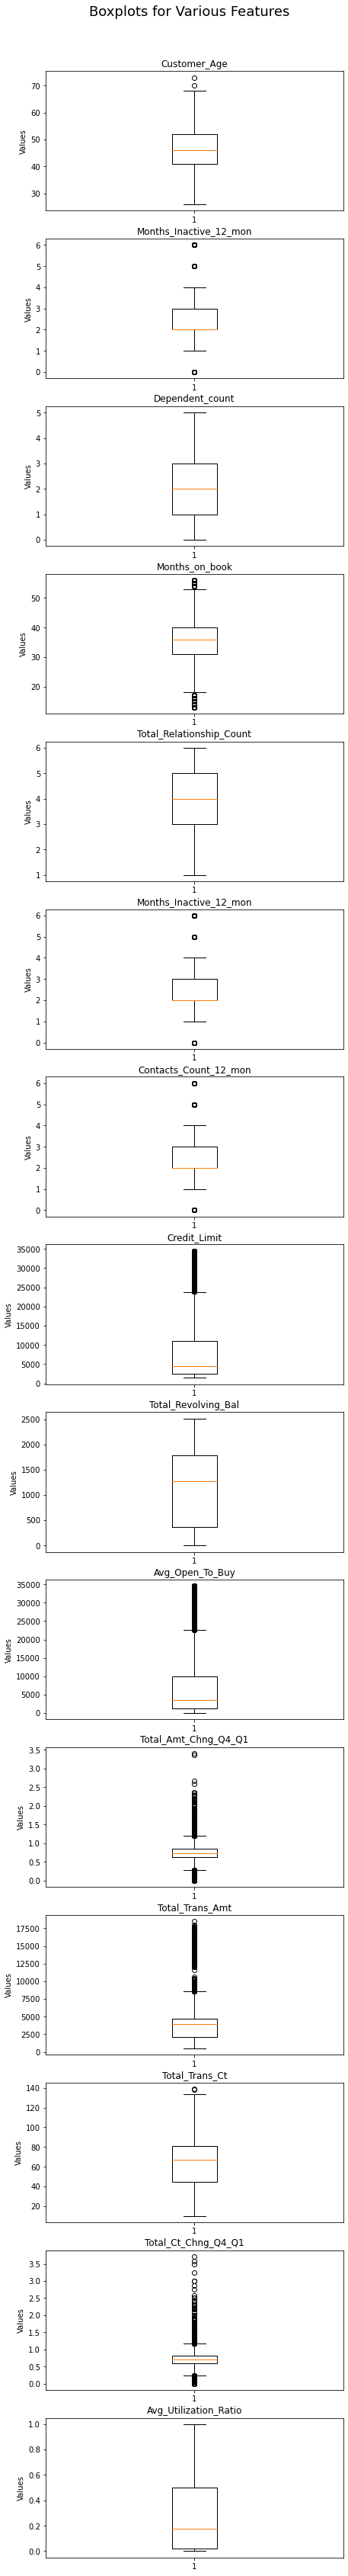

In [25]:
# Create a boxplot for each of the column in the above list

fig, ax = plt.subplots(len(check_outlier_cols),1, figsize=(7, len(check_outlier_cols)*4))

for idx, col in enumerate(check_outlier_cols):
    
    ax[idx].boxplot(df[col])
    ax[idx].set_ylabel('Values')
    ax[idx].set_title(f'{col}')

plt.suptitle('Boxplots for Various Features', x=.5, y=.9, fontsize = 18)
plt.show()

## 2. First stage EDA

- here we perform some general analysis and visulization to get familiar with the data.

- more data analysis will be performed in the other notebooks when addressing specific questions.

### 2.1 Insights from the pairplot below:

- in 'CLIENTNUM', there are two clusters. What is that? Can it help filling missing values?

- in 'Months_on_Book', there is a spike at the value 36. Is that a mean/median/mode? If so, it's very likely that it results from some missing data imputing (by others!).

- Visible strong factors that affect Churn Rate:
      -- Total_Trans_Amt
      -- Total_Trans_ct
      -- Total_Revolving_Bal
      -- Total_Amt_change
      -- Total_count_change

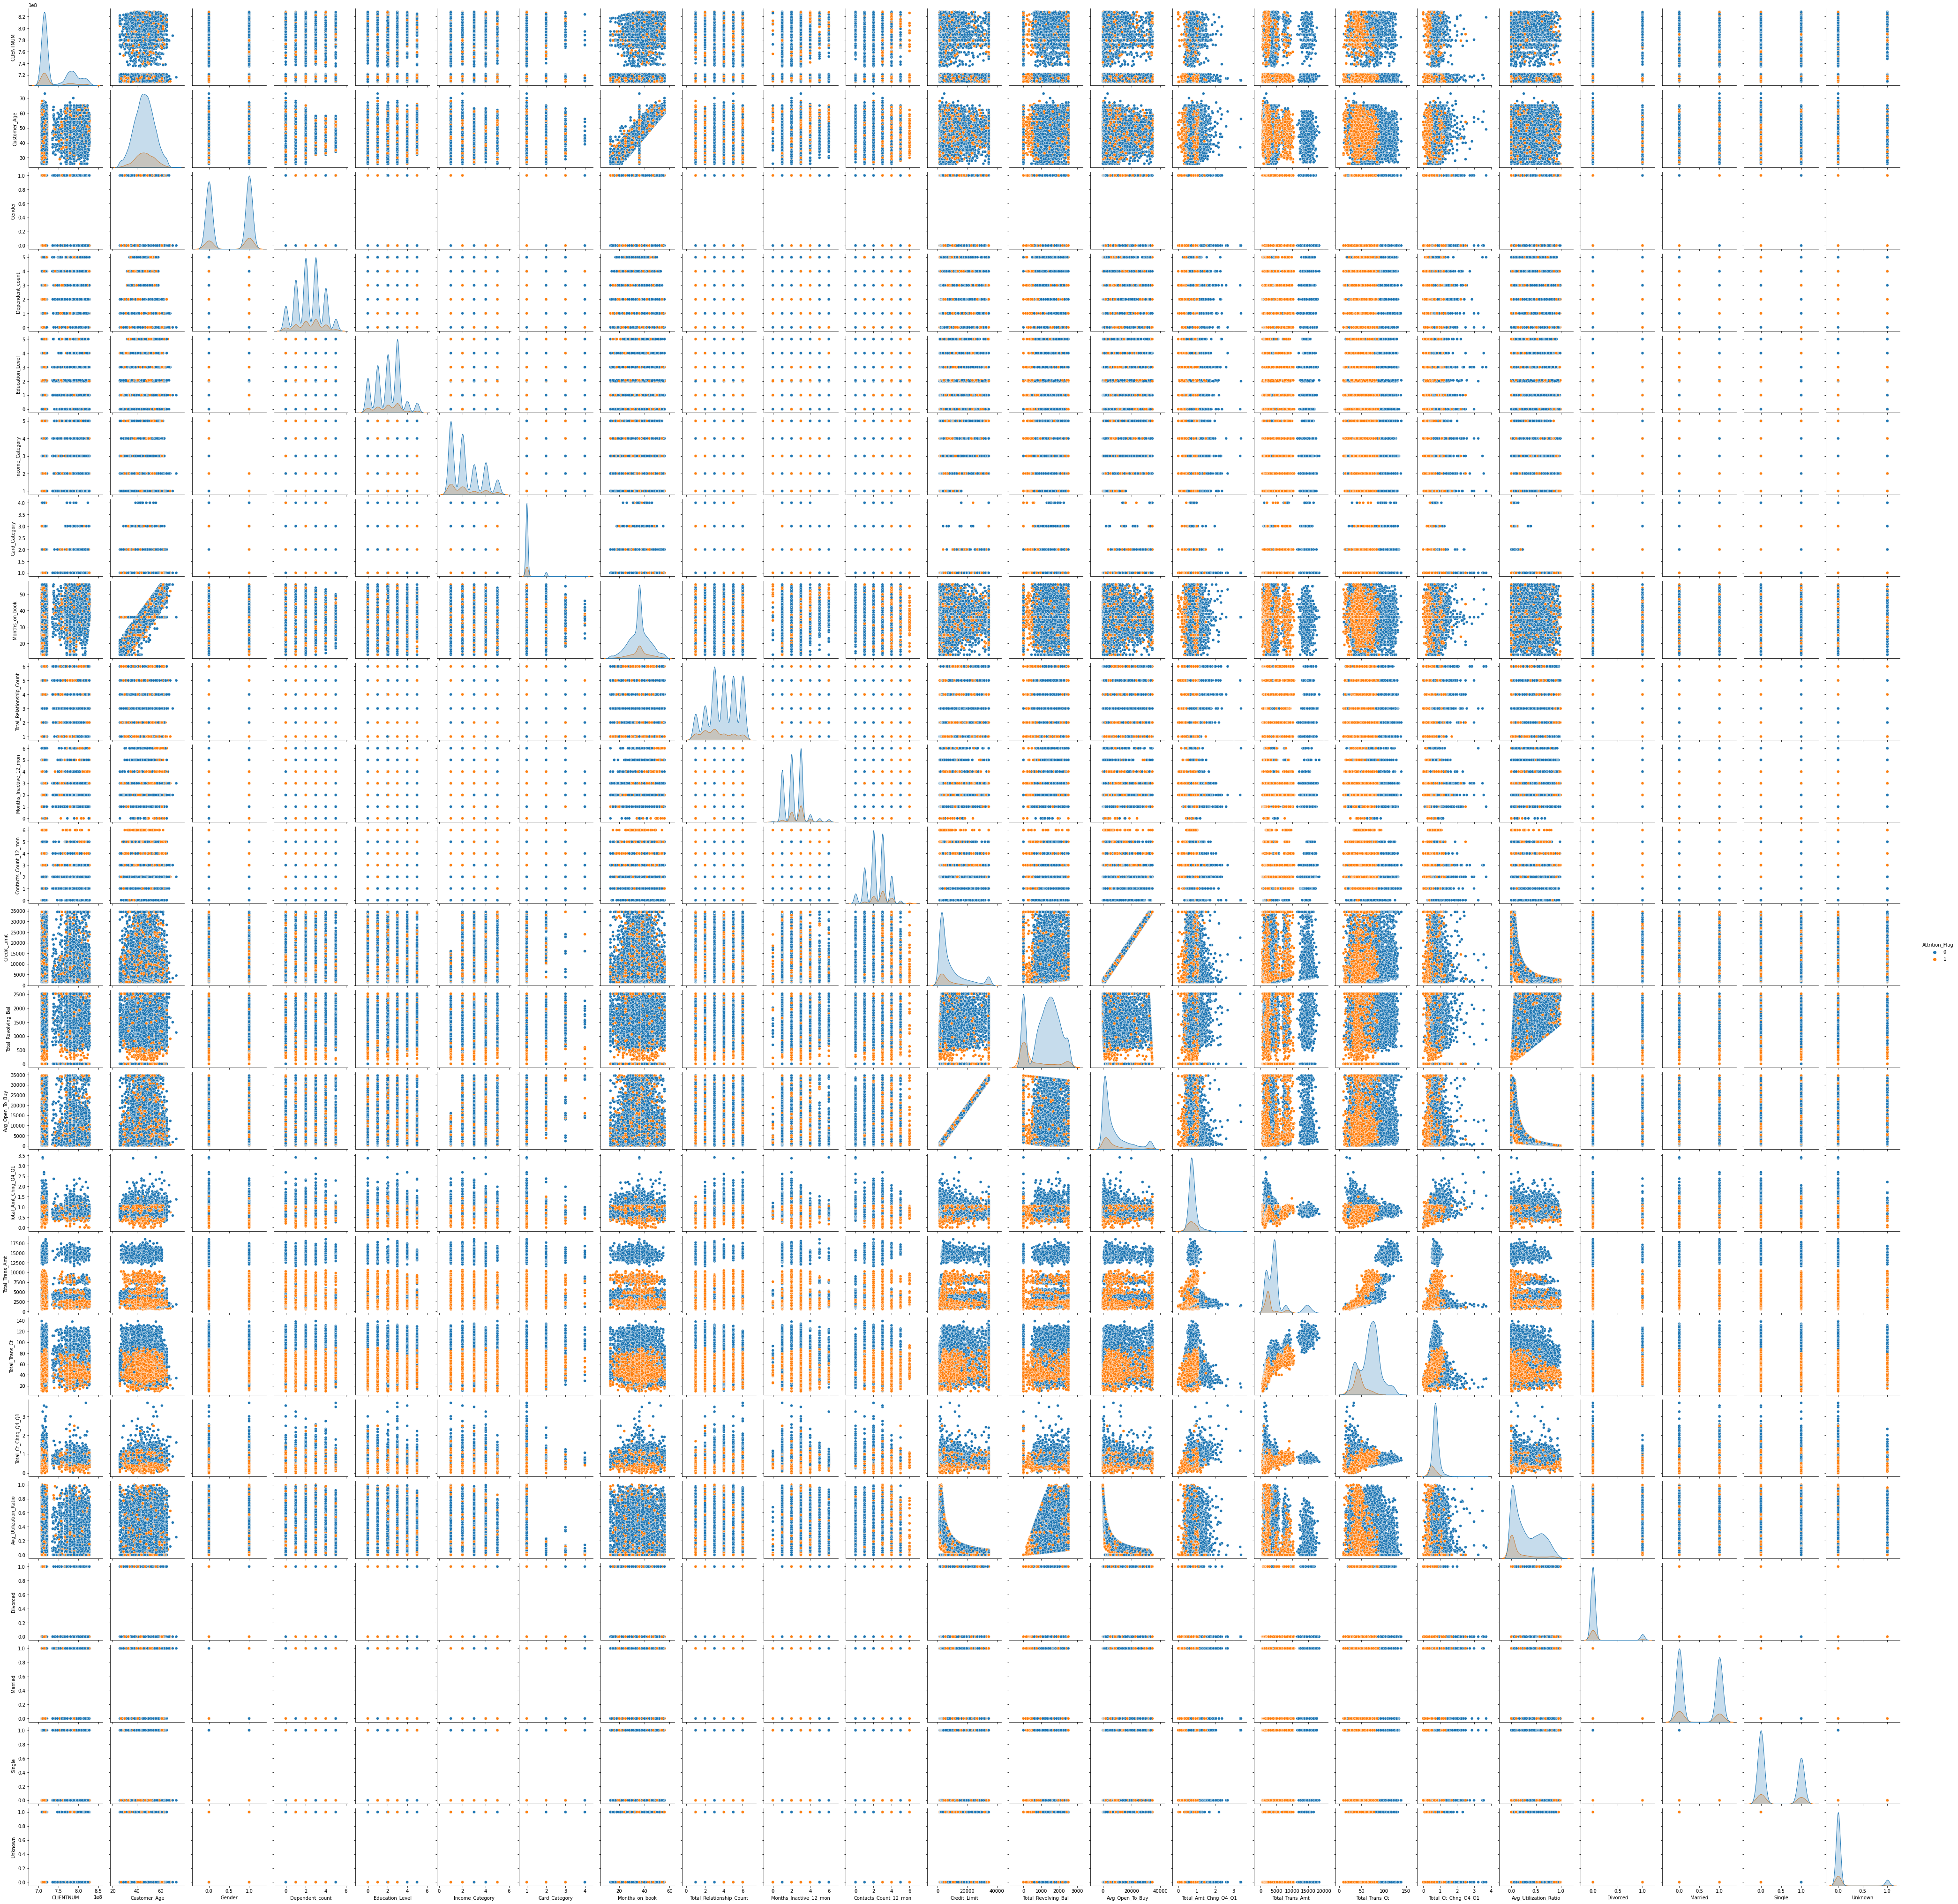

In [26]:
# As we have a not so large number of columns,
# we can plot pairwise scattering diagrams.
 
sns.pairplot(df, hue='Attrition_Flag');

### 2.2 Insights from Corr-heat map below:

- 'Age' and 'Months_on_Book' have strong correlation (0.81). 

    So we have an option to use it to impute the abnormal spike at value 36 in 'Months_on_book'. 
    
    But based on the 'Age'-'Months_on_book' scatter plot, it's not clear this will provide significant improvement.
    
    

- Some strongly correlated pairs:

    -- (total_trans_amt, total_trans_ct)
    
    -- (total_revolving_bal, avg_ultilization)
    
    -- (credit limit, income_cat/card_cat)
    

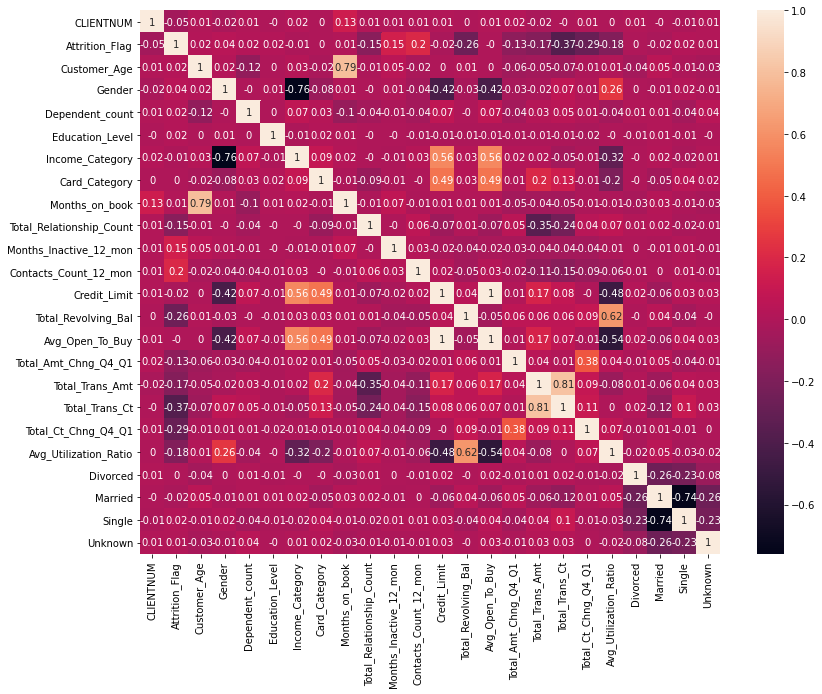

In [27]:
# correlation matrix
dims = (13, 10)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(df.corr().round(2), annot=True);

### 2.3 Actions based on the insights above:

1. investigate the two clusters in CLIENTNUM.   --> No significant different found. We delete the column CLIENTNUM.
    
    

2. (potentially) impute the abnormal spike at value 36 in 'Months_on_Book' using 'Age'.




#### 2.3.1 Investigate the two clusters in CLIENTNUM.

In [28]:
# we saw there is gap around 7.3e8 in the values of 'CLIENTNUM'
# create a cluster variable and groupby it

columns = ['Card_Category', 'Income_Category', 'Months_on_book', 'Education_Level']
df['ClientNum_Cluster'] = (df.CLIENTNUM>7.3e8)*1
cluster_1 = df[df.ClientNum_Cluster>0][columns]
cluster_0 = df[df.ClientNum_Cluster==0][columns]

In [29]:
y_1 = cluster_1.mean().values/[1,1,36,1]
y_0 = cluster_0.mean().values/[1,1,36,1]

x = np.array(range(len(cluster_0.columns)))

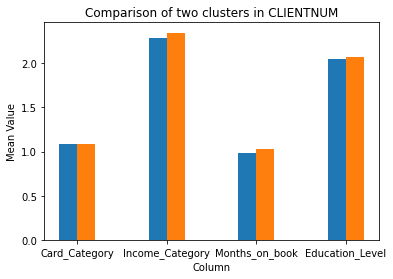

In [30]:
fig, ax = plt.subplots(1,1)

width=0.2

ax.bar(x-width/2, y_0, width=width)
ax.bar(x+width/2, y_1, width=width)
plt.xticks(x, columns)
plt.title('Comparison of two clusters in CLIENTNUM')
plt.ylabel('Mean Value')
plt.xlabel('Column')

plt.show()

- There is no sizable differences between the two clusters when comparing the means of above features.


- We'll delete the 'CLIENTNUM' column, but keep the 'ClientNum_Cluster' we just created for later.

In [31]:
# drop 'CLIENTNUM' column

df.drop('CLIENTNUM', axis=1, inplace=True)

#### 2.3.2 Investigate the abnormal spike at value 36 in "Months_on_book"
---> it's very likely that this was a result of missing value filling by mean/mode/median.

In [32]:
df.Months_on_book.mean()

35.928409203120374

In [33]:
df[df.Months_on_book!=36].Months_on_book.mean()

35.905401878914404

- There is a strong correlation (0.8) between 'Age' and 'Months_on_book', which is also visualized in the scattering plot between these two variables. 

- So we may re-impute 'Months_on_book' by building a linear model based on 'Age'.

- However, so far there is no clear benefit of doing this. May return to this point later.

## 3. Save data for later use.



In [34]:
# Sanity check
df.shape

(10127, 24)

In [35]:
# save data in a .pkl file for later use.

with open('1_data_after_notebook1.pkl', 'wb') as pickle_file:
    pickle.dump(df, pickle_file)